### Here, we will load some datasets from sklearn with multi class, and try to model them using some algorithms

In [129]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
digits= load_digits()
import numpy as np
from matplotlib.legend_handler import HandlerLine2D

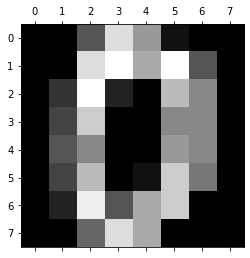

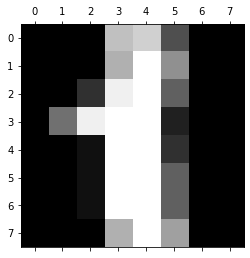

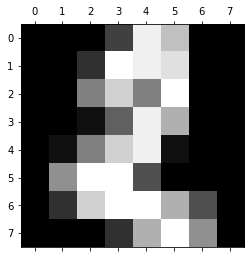

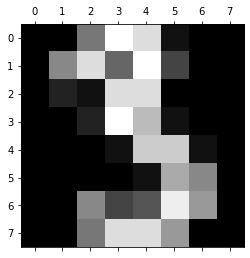

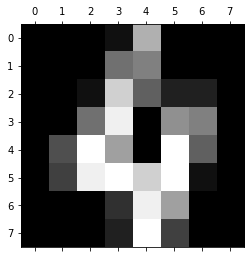

In [77]:

for i in range(5):
    plt.matshow(digits.images[i], cmap='gray')

### As we saw above, there are images of handwritten digits from 0 to 9 which we need to predict. Now let's see what all features does digits data contain.

In [78]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [79]:
## This shows us the description so it is not much relevant
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [80]:
digits.data
## This shows the data is arranged into 8 x8 matrix

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [81]:
print(digits.feature_names)
print("length of the dataset is ",len(digits.feature_names))  
## So we have images which we saw in the second cell, and then we have numerics of those digits in feature_names and as we can see it is exactly 64.

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
length of the dataset is  64


In [82]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [83]:
digits.target_names    
## This is the label, Which says that we have to 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
print("This is how digits.data[0] looks on matrix")
digits.data[0]

This is how digits.data[0] looks on matrix


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

This is how digits.data[0] looks on graph/image format


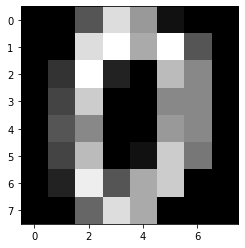

In [85]:
print("This is how digits.data[0] looks on graph/image format")
plt.imshow(digits.images[0], cmap='gray')

In [86]:
## Now let's create train test split
x_train,x_test,y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [87]:
x_train.shape, y_train.shape

((1437, 64), (1437,))

In [88]:
x_test.shape, y_test.shape

((360, 64), (360,))

## Creating logistic regression model

In [89]:
from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression()

In [90]:
log_class.fit(x_train, y_train)

C:\Users\atulkumarrai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
logistic_score = log_class.score(x_test,y_test)
logistic_score

0.975

### Let's check the accuracy of the logistic regression model using confusion matrix

In [92]:
y_predic=log_class.predict(x_test)

In [93]:
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, y_predic)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 35,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 30]], dtype=int64)

In [94]:
### Since, we didn't uinderstand much from the above CM let's try to implement it using seaborn

In [95]:
def visualize_cm(cm,title):
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=True)
    plt.title(title)
    plt.xlabel('Predicted numbers from y_predict')
    plt.ylabel('Truth numbers from y_test')

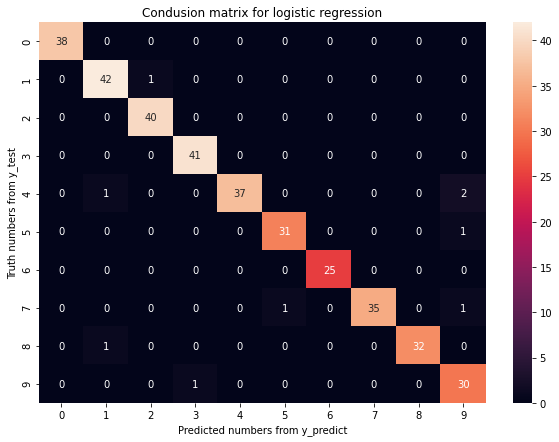

In [96]:
visualize_cm(cm = cm, title="Condusion matrix for logistic regression")

### Let's check this on decision tree classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree_class=DecisionTreeClassifier()

In [98]:
dtree_class.fit(x_train,y_train)

DecisionTreeClassifier()

In [105]:
## checking the accuracy
dtree_score = dtree_class.score(x_test,y_test)
dtree_score

0.8416666666666667

In [101]:
y_predic_dtree=dtree_class.predict(x_test)
cm_dtree = confusion_matrix(y_test, y_predic_dtree)
cm_dtree

array([[35,  0,  0,  0,  0,  1,  0,  0,  0,  2],
       [ 0, 35,  1,  0,  1,  0,  0,  2,  1,  3],
       [ 2,  0, 28,  3,  1,  0,  2,  1,  3,  0],
       [ 0,  1,  1, 32,  0,  0,  0,  4,  3,  0],
       [ 0,  0,  0,  0, 35,  1,  1,  3,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  1,  0,  1,  1],
       [ 2,  0,  0,  0,  1,  1, 21,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0, 35,  0,  0],
       [ 1,  1,  1,  1,  0,  0,  0,  1, 26,  2],
       [ 0,  2,  0,  0,  0,  0,  0,  1,  1, 27]], dtype=int64)

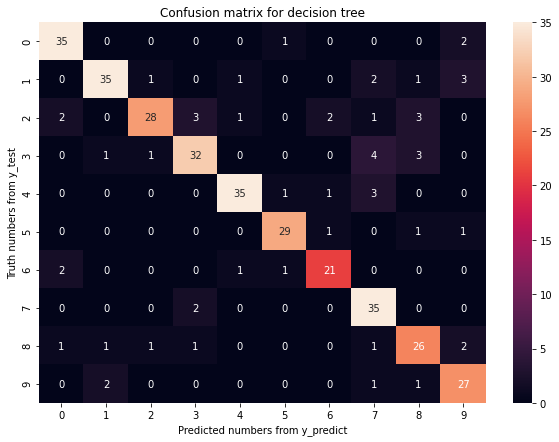

In [102]:
## Visualize the confusion matrix of the decision tree
visualize_cm(cm = cm_dtree, title= "Confusion matrix for decision tree")

## Let's utilize random forest now

 Score = 0.9777777777777777


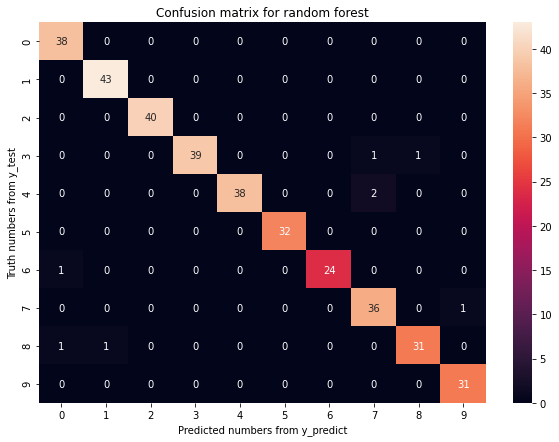

In [126]:
from sklearn.ensemble import RandomForestClassifier
rand_class=RandomForestClassifier()
rand_class.fit(x_train, y_train)
random_score = rand_class.score(x_test, y_test)
print(f" Score = {random_score}")
y_predic_rand = rand_class.predict(x_test)
cm_rand = confusion_matrix(y_test, y_predic_rand)
visualize_cm(cm_rand,"Confusion matrix for random forest")

ValueError: x and y must have same first dimension, but have shapes (4,) and (3,)

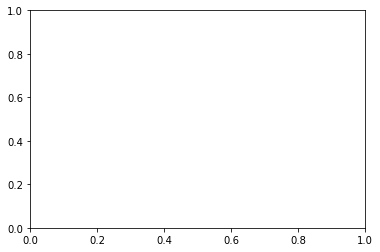

In [112]:
test_results=[logistic_score, dtree_score, random_score]

percentage=[25,50,75,100]
plt.plot(percentage,test_results)

In [124]:
names = ['Logistic regression', 'Decision Tree', 'Random forest']

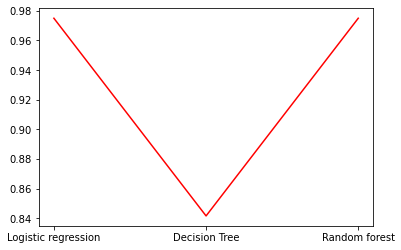

In [138]:
plt.plot(names, test_results, 'r')

Text(0, 0.5, 'Accuracy')

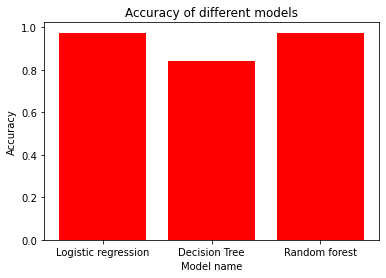

In [145]:
plt.bar(names, test_results, align='center', color = 'r')
plt.title("Accuracy of different models")
plt.xlabel("Model name")
plt.ylabel("Accuracy")